In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("ADNIMERGE.csv")

In [3]:
data_dict = pd.read_csv("ADNIMERGE_DICT.csv")

In [104]:

sns.set_context()

level_of_dementia = [None, 'CN', 'MCI', 'Dementia' ]
data[data.DX.isnull()]
data.columns

Index(['RID', 'PTID', 'VISCODE', 'SITE', 'COLPROT', 'ORIGPROT', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT',
       'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13',
       'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang',
       'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt',
       'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'FLDSTRENG', 'FSVERSION',
       'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform',
       'MidTemp', 'ICV', 'DX', 'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl',
       'ADAS13_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
       'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl',
       'FLDSTRENG_bl', 'FSVERSION_bl', 'Ventricles_bl', 'Hippocampus_bl',
       'WholeBrain_bl', 'Entorhinal_bl

In [105]:
interesting_cols_1 = ['RID','EXAMDATE', 'MMSE', 'RAVLT_perc_forgetting', 'FAQ']

subset_1 = data[interesting_cols_1]

subset_1.EXAMDATE = pd.to_datetime(subset_1.EXAMDATE)
subset_1['EXAMDATE'] = subset_1['EXAMDATE'].map(lambda x:x.date())

C:\Users\Neeti\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Neeti\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


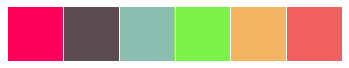

In [141]:
flatui = ["#FD0059", "#5C4B51", "#8CBEB2", "#7BF249", "#F3B562", "#F06060" ]
sns.palplot(sns.color_palette(flatui))
sns.set_palette(flatui)

In [107]:
count_test = subset_1.groupby("RID", as_index= False)["EXAMDATE"].count()
count_test = count_test.rename(columns = {"EXAMDATE" : "count"})
count_test[count_test["count"]>17]


,RID,count
17,31,19
19,35,18
23,42,18
39,61,19
46,74,18
75,112,19
79,120,18
80,123,18
82,126,19
111,178,18


In [118]:
first_test = subset_1.groupby("RID", as_index=False)["EXAMDATE"].min()
first_test = first_test.rename(columns = {"EXAMDATE" : "first_test"})
MMSE_diff = subset_1.groupby("RID", as_index=True)["MMSE"].max() - subset_1.groupby("RID", as_index=True)["MMSE"].min()
RAVLT_diff = subset_1.groupby("RID", as_index=False)["RAVLT_perc_forgetting"].max() - subset_1.groupby("RID", as_index=False)["RAVLT_perc_forgetting"].min()
FAQ_diff = subset_1.groupby("RID", as_index=False)["FAQ"].max() - subset_1.groupby("RID", as_index=False)["FAQ"].min()
last_test = subset_1.groupby("RID", as_index= False)["EXAMDATE"].max()
last_test = last_test.rename(columns = {"EXAMDATE" : "last_test"})
count_test = subset_1.groupby("RID", as_index= False)["EXAMDATE"].count()
count_test = count_test.rename(columns = {"EXAMDATE" : "count"})
test_time_df = pd.merge(first_test,last_test)
test_time_df = pd.merge(test_time_df, count_test)
#test_time_df.first_test = test_time_df['first_test'].map(lambda x:x.date())
#test_time_df['last_test'] = test_time_df['last_test'].map(lambda x:x.date())

30.0

In [109]:
test_time_df["Diff_month"] = (test_time_df.last_test - test_time_df.first_test)/ np.timedelta64(1, 'M')
#test_time_df.Diff_month = test_time_df.Diff_month.map(lambda x: x.)
min(test_time_df.first_test)
test_time_df

,RID,first_test,last_test,count,Diff_month
0,2,2005-09-08,2016-06-23,14,129.481098
1,3,2005-09-12,2007-09-12,5,23.984065
2,4,2005-11-08,2008-11-18,6,36.337502
3,5,2005-09-07,2008-09-10,7,36.107518
4,6,2005-11-29,2008-12-08,7,36.304647
5,7,2005-10-06,2007-10-09,5,24.082630
6,8,2005-09-19,2015-10-29,14,121.300232
7,10,2005-11-10,2007-11-07,5,23.885501
8,14,2005-11-04,2008-11-05,6,36.041808
9,15,2005-10-18,2012-04-10,9,77.734656


<Container object of 1784 artists>

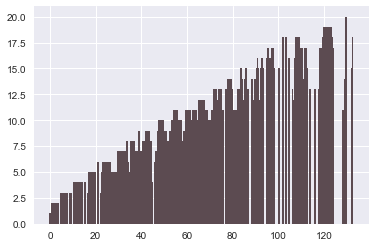

In [71]:
plt.bar(test_time_df.Diff_month, test_time_df["count"])

In [96]:
from numpy import arange

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

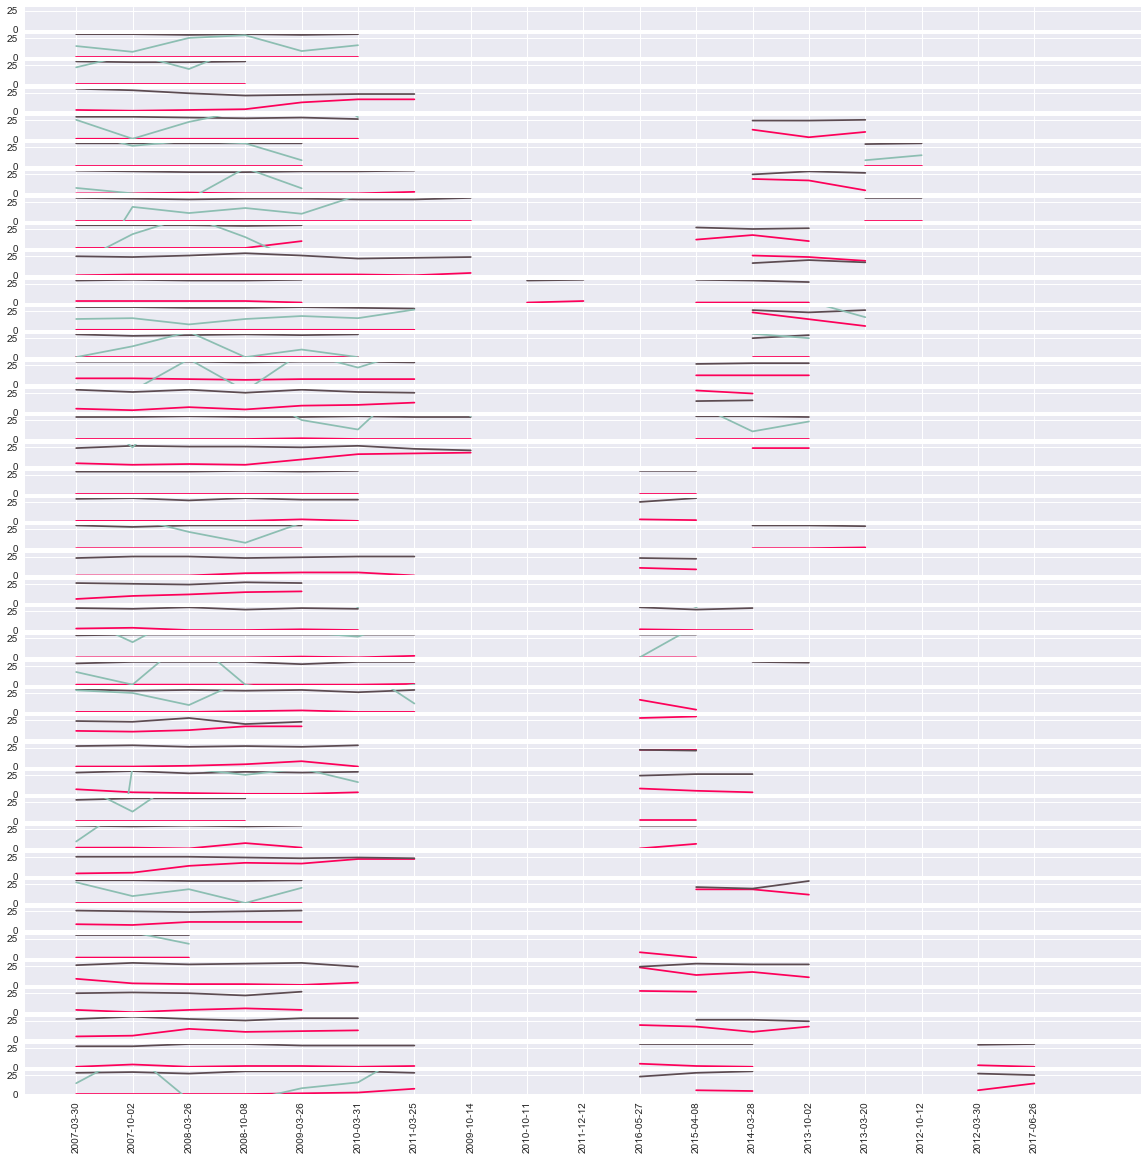

In [151]:
fig, axes = plt.subplots(40,1,figsize=(20, 20), sharey= True, sharex=True)
i = 0
cdict = {'red':   [(0.0, 1.0, 1.0),  # red decreases
                   (1.0, 0.0, 0.0)],

         'green': [(0.0, 0.0, 0.0),  # green increases
                   (1.0, 1.0, 1.0)],

         'blue':  [(0.0, 0.0, 0.0),  # no blue at all
                   (1.0, 0.0, 0.0)]}

red_green_cm = LinearSegmentedColormap('GreenBlue', cdict,40)
colors = cm.get_cmap(red_green_cm, 40)
#plt.xlabel("Date Range", fontsize=20)
#plt.ylabel("Test Scores", fontsize=20)
#plt.legend(loc = 'upper right')
#plt.title("TIME CHANGE IN TEST SCORES FOR PATIENTS WITH TEST COUNTS >17")
for rid in test_time_df.RID[test_time_df["count"]>17]:
    for pat, df_patient in data.groupby('RID'):
        if(rid == df_patient.RID.unique()[0]):
            #print(i)
            i = i+1
            #print(range(len(df_patient.EXAMDATE.values)))
            axes[i].plot(range(len(df_patient.EXAMDATE.values)), df_patient.FAQ)
            axes[i].plot(range(len(df_patient.EXAMDATE.values)), df_patient.MMSE)
            axes[i].plot(range(len(df_patient.EXAMDATE.values)), df_patient.RAVLT_perc_forgetting)
            axes[i].set_ylim(0,30)
            plt.xticks(range(len(df_patient.EXAMDATE.values)), df_patient.EXAMDATE.values, rotation='vertical')


KeyboardInterrupt: 

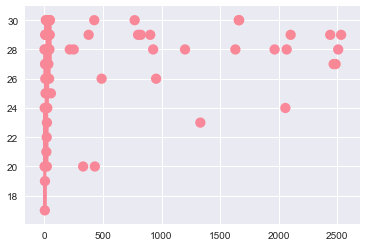

In [39]:
sns.pointplot(x="EXAMDATE", y="MMSE", hue="RID", data=data)

In [63]:
import matplotlib.dates as mdates

19


ValueError: could not convert string to float: '2011-10-20'

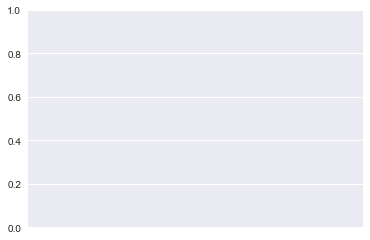

In [64]:
#fig, ax = plt.subplots(78,4)



x =[]
for pat, df_patient in data.groupby('RID'):
    #pat_list = []
    #pat_list.append(df_patient)
    #val = df_patient.RID.unique()[0]
    if(len(df_patient.RID)>17):
        x.append(len(df_patient.RID))
        print(len(df_patient.RID))
        plt.plot(df_patient.EXAMDATE, df_patient.MMSE)

         

print("ENDENDENDENDENDEND")
print(len(x))

KeyboardInterrupt: 

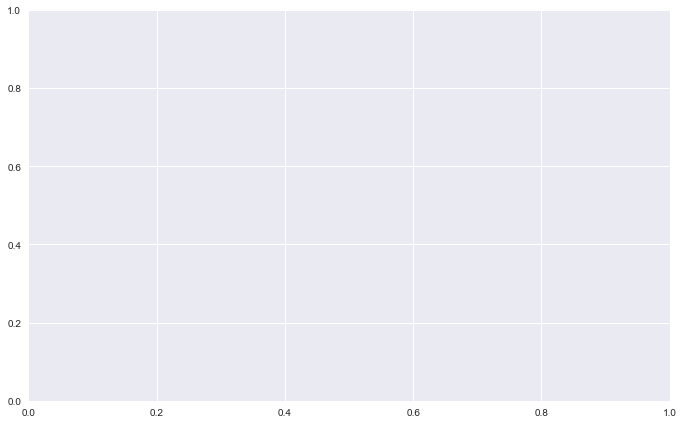

In [14]:
g = sns.factorplot(x="RID", y = "Diff_month", hue="RID", data = test_time_df[test_time_df["count"]>1], kind = "bar", size = 6, aspect =1.6)

In [ ]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="RID", hue="RID", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [10]:
sns.set_context()
# fig, ax = plt.subplots(1,1,figsize = (15,15))

tiny = subset[['DX_bl','FAQ']]
tiny = tiny.dropna(axis=0,how='any')

In [8]:
tiny.shape

(9198, 2)

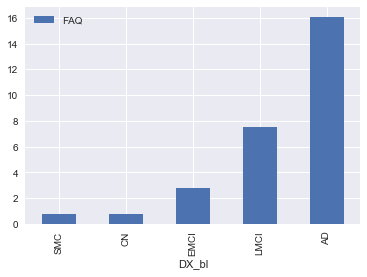

In [13]:
tiny.groupby(by="DX_bl").mean().sort_values(by="FAQ").plot(kind="bar")

In [14]:
data.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,2017-08-13 23:50:48.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.000000,0.00000,0,0,2017-08-13 23:50:48.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.498289,5.96721,6,6,2017-08-13 23:50:48.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.999316,11.96720,12,12,2017-08-13 23:50:48.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,1.998630,23.93440,24,24,2017-08-13 23:50:48.0


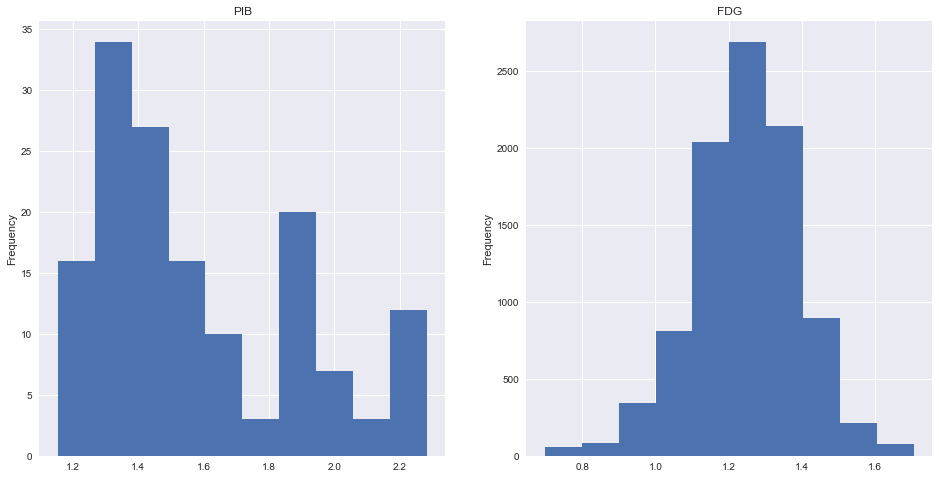

In [61]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
data['PIB_bl'].plot(kind='hist',ax=ax[0])
ax[0].set_title('PIB')
data['FDG_bl'].plot(kind='hist',ax=ax[1])
ax[1].set_title('FDG')

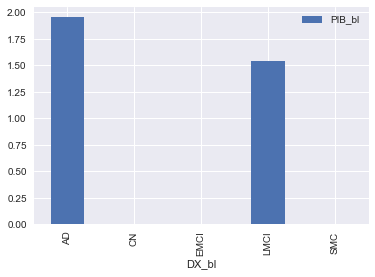

In [62]:
data[['DX_bl','PIB_bl']].groupby(by='DX_bl').mean().plot(kind="bar")

In [32]:
#masks
ad = data[data['DX_bl'] == 'AD']
cn = data[data['DX_bl'] == 'CN']
emci = data[data['DX_bl'] == 'EMCI']
lmci = data[data['DX_bl'] == 'LMCI']
smc = data[data['DX_bl'] == 'SMC']

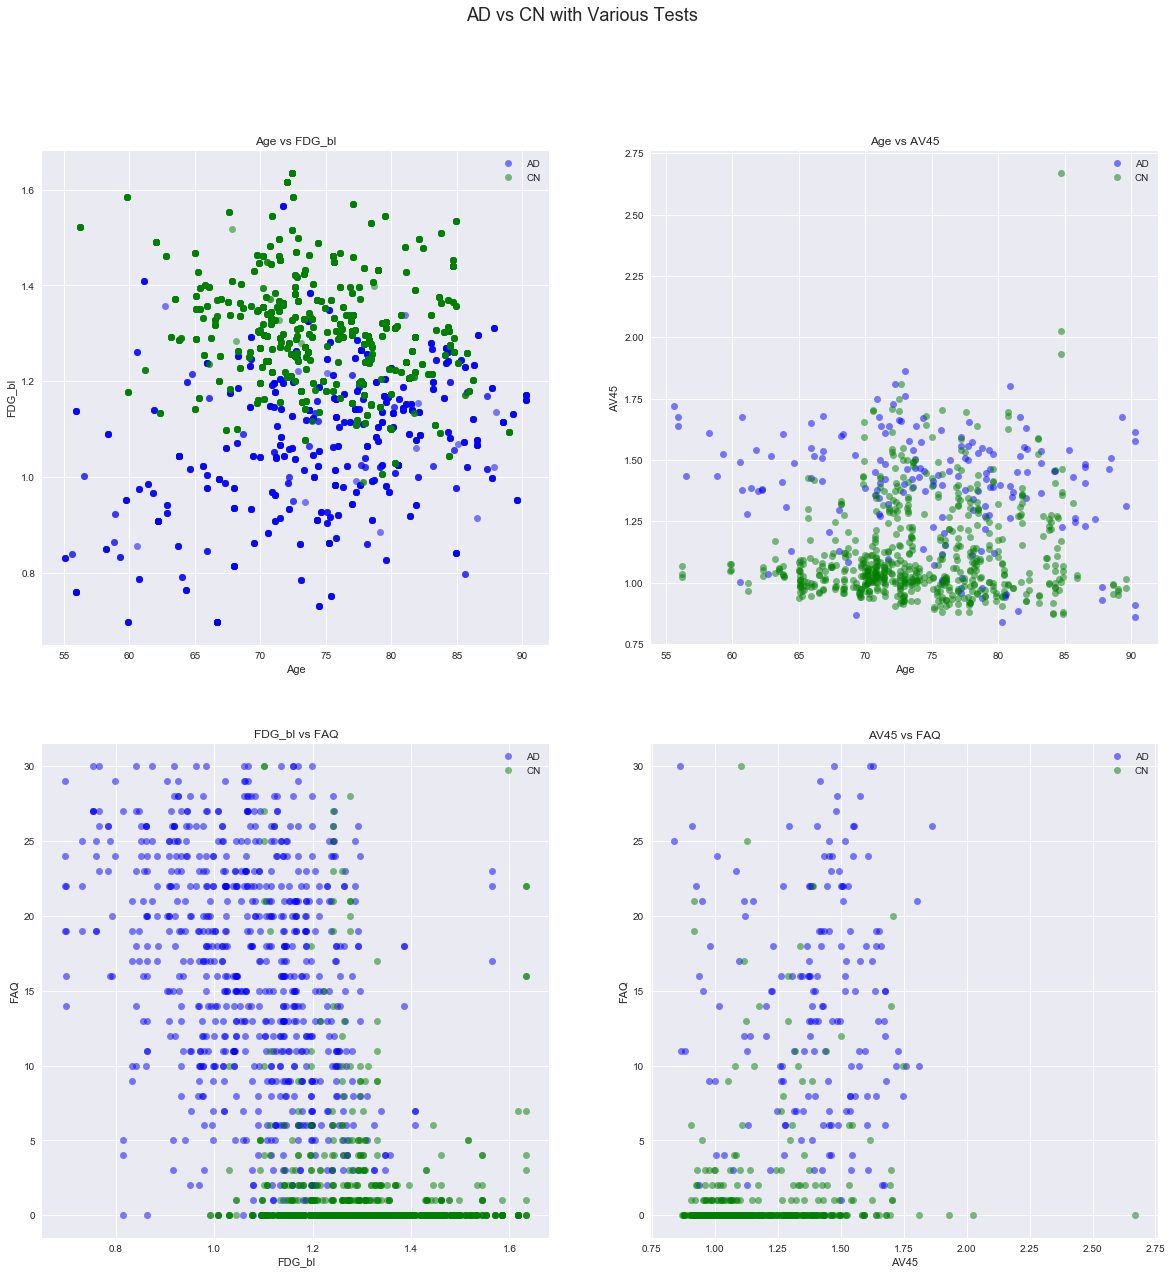

In [63]:
fig, ax = plt.subplots(2,2,figsize = (20,20))
fig.suptitle("AD vs CN with Various Tests", fontsize=18)
#I'm color blind, so red vs green is hard for me.
ax[0,0].plot(ad.AGE,ad.FDG_bl,"o",color='blue',alpha=.5,label='AD')
ax[0,0].plot(cn.AGE,cn.FDG_bl,"o",color='green',alpha=.5,label = 'CN')
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('FDG_bl')
ax[0,0].set_title('Age vs FDG_bl')
ax[0,0].legend(loc='best')

ax[0,1].plot(ad.AGE,ad.AV45,"o",color='blue',alpha=.5,label='AD')
ax[0,1].plot(cn.AGE,cn.AV45,"o",color='green',alpha=.5,label = 'CN')
ax[0,1].set_xlabel('Age')
ax[0,1].set_ylabel('AV45')
ax[0,1].set_title('Age vs AV45')
ax[0,1].legend(loc='best')

ax[1,1].plot(ad.AV45,ad.FAQ,"o",color='blue',alpha=.5,label='AD')
ax[1,1].plot(cn.AV45,cn.FAQ,"o",color='green',alpha=.5,label = 'CN')
ax[1,1].set_xlabel('AV45')
ax[1,1].set_ylabel('FAQ')
ax[1,1].set_title('AV45 vs FAQ')
ax[1,1].legend(loc='best')

ax[1,0].plot(ad.FDG_bl,ad.FAQ,"o",color='blue',alpha=.5,label='AD')
ax[1,0].plot(cn.FDG_bl,cn.FAQ,"o",color='green',alpha=.5,label = 'CN')
ax[1,0].set_xlabel('FDG_bl')
ax[1,0].set_ylabel('FAQ')
ax[1,0].set_title('FDG_bl vs FAQ')
ax[1,0].legend(loc='best')

In [84]:
by_RID = data.sort_values(["RID","EXAMDATE"])
by_RID = by_RID.reset_index(drop=True)
by_RID.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,2017-08-13 23:50:48.0
1,2,011_S_0002,m06,11,ADNI1,ADNI1,2006-03-06,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.490075,5.86885,6,6,2017-08-13 23:50:48.0
2,2,011_S_0002,m36,11,ADNI1,ADNI1,2008-08-27,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,2.967830,35.54100,36,36,2017-08-13 23:50:48.0
3,2,011_S_0002,m60,11,ADNIGO,ADNI1,2010-09-22,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,5.037650,60.32790,60,60,2017-08-13 23:50:48.0
4,2,011_S_0002,m66,11,ADNIGO,ADNI1,2011-03-04,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,5.483920,65.67210,66,66,2017-08-13 23:50:48.0


In [183]:
ids = by_RID['RID'].unique()

In [184]:
counter = 0
indeces = []
for row in range(len(by_RID)):
    if by_RID['RID'][row] == ids[counter+1]:
#         print(by_RID['RID'][row], by_RID['RID'][row+1])
        indeces.append(row-1)
#         if by_RID['RID'][row] == by_RID['RID'][row+1]:
#             indeces.append(row)
        counter += 1
last_exam = by_RID.iloc[indeces]

In [185]:
print("Percent left after removing longitudinal data: ", (last_exam.shape[0]/data.shape[0])*100)

Percent left after removing longitudinal data:  13.697472535914573


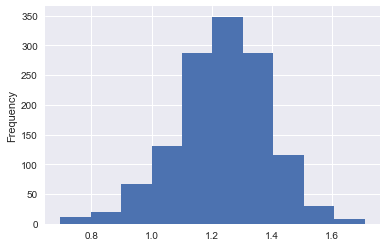

In [186]:
last_exam['FDG_bl'].plot(kind="hist")

In [187]:
ad2 = last_exam[last_exam['DX_bl']=='AD']
cn2 = last_exam[last_exam['DX_bl']=='CN']

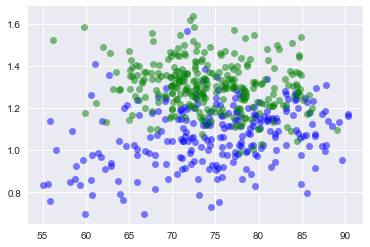

In [188]:
plt.plot(ad2.AGE,ad2.FDG_bl,"o",color="blue",alpha=.5)
plt.plot(cn2.AGE,cn2.FDG_bl,"o",color="green",alpha=.5)

In [190]:
last_exam = pd.get_dummies(last_exam, columns=['PTGENDER','PTETHCAT','PTRACCAT','PTMARRY'], drop_first=True)

In [203]:
cols = list(last_exam)
cols

['RID',
 'PTID',
 'VISCODE',
 'SITE',
 'COLPROT',
 'ORIGPROT',
 'EXAMDATE',
 'DX_bl',
 'AGE',
 'PTEDUCAT',
 'APOE4',
 'FDG',
 'PIB',
 'AV45',
 'CDRSB',
 'ADAS11',
 'ADAS13',
 'MMSE',
 'RAVLT_immediate',
 'RAVLT_learning',
 'RAVLT_forgetting',
 'RAVLT_perc_forgetting',
 'FAQ',
 'MOCA',
 'EcogPtMem',
 'EcogPtLang',
 'EcogPtVisspat',
 'EcogPtPlan',
 'EcogPtOrgan',
 'EcogPtDivatt',
 'EcogPtTotal',
 'EcogSPMem',
 'EcogSPLang',
 'EcogSPVisspat',
 'EcogSPPlan',
 'EcogSPOrgan',
 'EcogSPDivatt',
 'EcogSPTotal',
 'FLDSTRENG',
 'FSVERSION',
 'Ventricles',
 'Hippocampus',
 'WholeBrain',
 'Entorhinal',
 'Fusiform',
 'MidTemp',
 'ICV',
 'DX',
 'EXAMDATE_bl',
 'CDRSB_bl',
 'ADAS11_bl',
 'ADAS13_bl',
 'MMSE_bl',
 'RAVLT_immediate_bl',
 'RAVLT_learning_bl',
 'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl',
 'FAQ_bl',
 'FLDSTRENG_bl',
 'FSVERSION_bl',
 'Ventricles_bl',
 'Hippocampus_bl',
 'WholeBrain_bl',
 'Entorhinal_bl',
 'Fusiform_bl',
 'MidTemp_bl',
 'ICV_bl',
 'MOCA_bl',
 'EcogPtMem_bl',
 'EcogP

/Users/agasthyapradhan-shenoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agasthyapradhan-shenoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


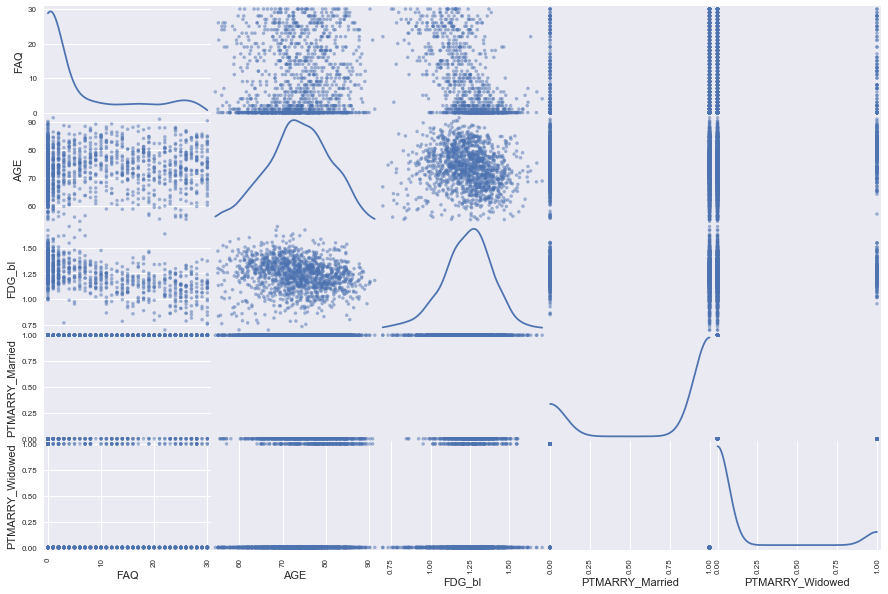

In [205]:
from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(1,1, figsize=(15,10))
axes = scatter_matrix(last_exam[['DX_bl','FAQ','AGE','FDG_bl','PTMARRY_Married','PTMARRY_Widowed']], alpha=0.5, diagonal='kde', ax=ax)
plt.show()

In [199]:
small = last_exam[['DX_bl','FAQ','AGE','FDG_bl','PTMARRY_Married','MMSE','AV45']]

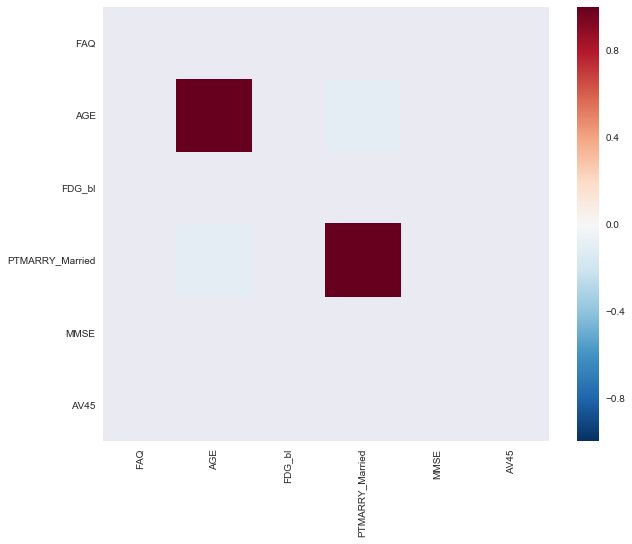

In [200]:
interesting_columns = small.drop('DX_bl', axis=1).columns
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.corrcoef(small.drop('DX_bl', axis=1).T), ax=ax)
ax.set_xticklabels(interesting_columns, rotation='vertical')
ax.set_yticklabels(interesting_columns[::-1], rotation='horizontal')
plt.show()

In [206]:
from pandas.plotting import radviz

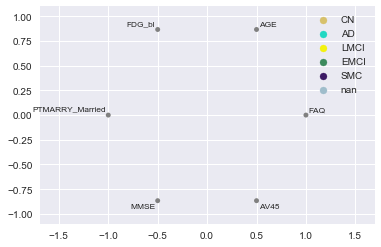

In [210]:
plt.figure()
radviz(small,'DX_bl')

In [211]:
last_exam

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTEDUCAT,...,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other PI,PTRACCAT_More than one,PTRACCAT_Unknown,PTRACCAT_White,PTMARRY_Married,PTMARRY_Never married,PTMARRY_Unknown,PTMARRY_Widowed
13,2,011_S_0002,m126,11,ADNI2,ADNI1,2016-06-23,CN,74.3,16,...,0,0,0,0,0,1,1,0,0,0
18,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,18,...,0,0,0,0,0,1,1,0,0,0
24,4,022_S_0004,m36,22,ADNI1,ADNI1,2008-11-18,LMCI,67.5,10,...,0,0,0,0,0,1,1,0,0,0
31,5,011_S_0005,m36,11,ADNI1,ADNI1,2008-09-10,CN,73.7,16,...,0,0,0,0,0,1,1,0,0,0
38,6,100_S_0006,m36,100,ADNI1,ADNI1,2008-12-08,LMCI,80.4,13,...,0,0,0,0,0,1,1,0,0,0
43,7,022_S_0007,m24,22,ADNI1,ADNI1,2007-10-09,AD,75.4,10,...,0,0,0,1,0,0,1,0,0,0
57,8,011_S_0008,m120,11,ADNI2,ADNI1,2015-10-29,CN,84.5,18,...,0,0,0,0,0,1,0,0,0,1
62,10,011_S_0010,m24,11,ADNI1,ADNI1,2007-11-07,AD,73.9,12,...,0,0,0,0,0,1,1,0,0,0
68,14,022_S_0014,m36,22,ADNI1,ADNI1,2008-11-05,CN,78.5,12,...,0,0,0,0,0,1,0,0,0,0
77,15,100_S_0015,m78,100,ADNI2,ADNI1,2012-04-10,CN,80.8,18,...,0,0,0,0,0,1,1,0,0,0
